# Limpieza y Exploración de datos

En este cuaderno nos centraremos en la **exploración** y la **preparación/normalización** de los dataframes generados por *new_extract_hands.py* para tener la menos cantidad de problemas posibles a la hora de entrenar nuestra red neuronal. 

In [79]:
# Librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Cargamos los datasets
rojo = pd.read_hdf("../data/dataFrames/rojo.h5")
hola = pd.read_hdf("../data/dataFrames/hola.h5")
mundo = pd.read_hdf("../data/dataFrames/mundo.h5")
ordenador = pd.read_hdf("../data/dataFrames/ordenador.h5")

Cada dataset está compuesto de tres campos:
- N_sample (numero de la muestra)
- Frame (cantidad de frames extraídos x muestra)
- Keypoints (los valores de los puntos de la mano o keypoints)

In [81]:
rojo.head()

,n_sample,frame,keypoints
0,0,1,"[0.6042745113372803, 0.5187959671020508, 1.306..."
1,0,2,"[0.6042745113372803, 0.5187959671020508, 1.306..."
2,0,3,"[0.597309947013855, 0.49771803617477417, 8.416..."
3,0,4,"[0.5954118967056274, 0.4799729585647583, -7.51..."
4,0,5,"[0.5931767225265503, 0.48217013478279114, -5.8..."


In [82]:
print(rojo.n_sample.unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230]


In [83]:
print(rojo.loc[0,"keypoints"])
print("Longitud del array de keypoints: ",len(rojo.loc[0,"keypoints"]))

[ 6.04274511e-01  5.18795967e-01  1.30650236e-07  6.06541753e-01
  4.74809349e-01 -2.46176589e-03  5.95366597e-01  4.26377147e-01
 -5.56635205e-03  5.78397036e-01  4.00597215e-01 -8.48224852e-03
  5.63467026e-01  3.88058454e-01 -1.19080720e-02  5.87060630e-01
  3.88561010e-01 -1.25878202e-02  5.72275400e-01  3.32891822e-01
 -1.90117657e-02  5.63329756e-01  3.03557098e-01 -2.32714918e-02
  5.55093169e-01  2.80725330e-01 -2.59312931e-02  5.74763596e-01
  3.99702609e-01 -1.55175021e-02  5.62754273e-01  3.36256087e-01
 -2.02673357e-02  5.54376543e-01  3.05379570e-01 -2.29391400e-02
  5.46313405e-01  2.82550097e-01 -2.47912705e-02  5.61893404e-01
  4.21414971e-01 -1.78476125e-02  5.47536135e-01  3.88651639e-01
 -2.34027114e-02  5.49524009e-01  3.95839781e-01 -2.40330230e-02
  5.53607047e-01  4.05086756e-01 -2.33954825e-02  5.49150169e-01
  4.49236810e-01 -1.99894086e-02  5.41173220e-01  4.29479510e-01
 -2.37557292e-02  5.45492291e-01  4.34399426e-01 -2.13098247e-02
  5.50920546e-01  4.43244

Podemos ver que un array de keypoints tiene 126 elementos. Esto se debe a que cada punto de la mano (un total de 21 por mano) está representado por los 3 ejes x,y,z.
Es decir, $(21*3) * 3 = 126$

Una vez dejado esto claro, vamos a asegurarnos que todas las palabras tengan una de frames por sample parecida.

In [90]:
ls = [rojo,hola,mundo,ordenador]
ls_name=["rojo","hola","mundo","ordenador"]
hold = []
hold_max = [] 
hold_min = []
for index,x in enumerate(ls):
    print(f"Media de frames en el dataset {ls_name[index]}: ",x.groupby("n_sample").frame.count().mean())
    hold_min.append(x.groupby("n_sample").frame.count().min())
    hold.append(x.groupby("n_sample").frame.count().mean())
    hold_max.append(x.groupby("n_sample").frame.count().max())
    print(f"Forma del dataset {ls_name[index]}: ",x.shape)
    print(f"Número de samples en el dataset {ls_name[index]}: ",len(x.n_sample.unique()))
    print()
hold = np.array(hold)
print("Media de frames de todas las muestras: ",hold.mean())

Media de frames en el dataset rojo:  16.636363636363637
Forma del dataset rojo:  (3843, 3)
Número de samples en el dataset rojo:  231

Media de frames en el dataset hola:  15.582089552238806
Forma del dataset hola:  (3132, 3)
Número de samples en el dataset hola:  201

Media de frames en el dataset mundo:  29.203980099502488
Forma del dataset mundo:  (5870, 3)
Número de samples en el dataset mundo:  201

Media de frames en el dataset ordenador:  19.823809523809523
Forma del dataset ordenador:  (4163, 3)
Número de samples en el dataset ordenador:  210

Media de frames de todas las muestras:  20.31156070297861


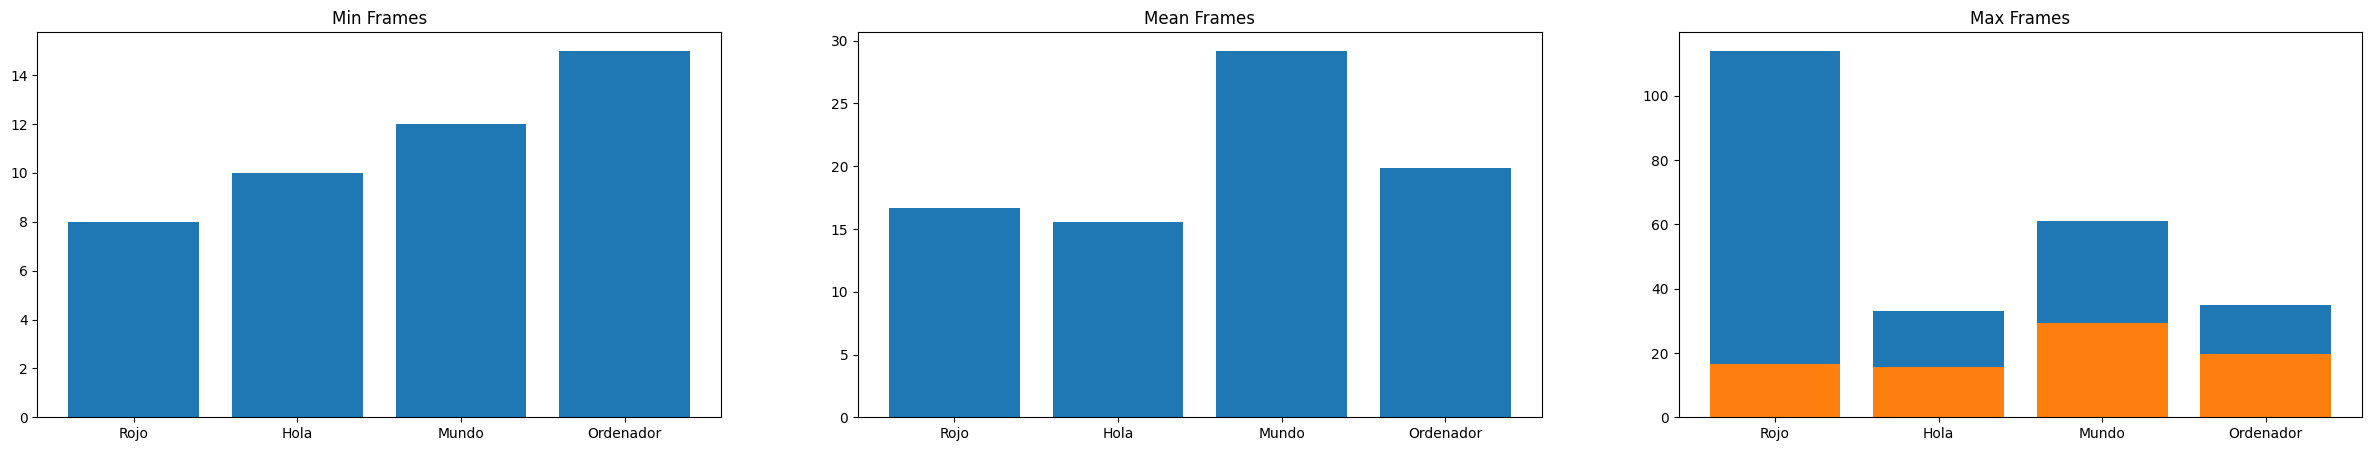

In [100]:
fig,axs = plt.subplots(1,3,figsize=(30,5))
axs[0].bar(["Rojo","Hola","Mundo","Ordenador"],hold_min)
axs[1].bar(["Rojo","Hola","Mundo","Ordenador"],hold)
axs[2].bar(["Rojo","Hola","Mundo","Ordenador"],hold_max)

axs[0].set_title("Min Frames")
axs[1].set_title("Mean Frames")
axs[2].set_title("Max Frames")

plt.bar([x for x in range(len(hold))],hold)
plt.show()

Gracias a las gráficas podemos ver como Rojo es el dataframe que tiene el samples con menos frame es rojo al igual que el dataframe con el sample con más frames.
Ademas, vemos que tres de los 4 datasets tienen más o menos la misma cantidad promedia de frames por sample salvo por el tercero, mundo
Durante la obtención de videos, establecimos una norma:
**En caso de fallar una grabación (ej. El gesto se ha acabado y no hay suficientes frames como para guardar el video), se deberá subir la mano para acabar con una sample superior a 60 para poder eliminarla posteriormente**

Por esta norma, procedemos a eliminar todos los samples cuyo número de frames sea igual a 60.

In [104]:
for ind, x in enumerate(ls):
    for num in x.n_sample.unique():
        indices = x[x.n_sample==num].index
        if x.loc[indices[-1],"frame"]>=60:
            x.drop(indices,inplace=True)

In [105]:
for index, x in enumerate(ls):
    print(x.shape)
    print(len(x.n_sample.unique()))

(2623, 3)
215
(3132, 3)
201
(5809, 3)
200
(4163, 3)
210


Comparando los datos, vemos que:
- 16 muestras eliminadas de rojo
- 1 muestra eliminada de mundo 

A continuación, vamos a re-enumerar los samples para que sigan un orden

In [106]:
for ind, x in enumerate(ls):
    for new_num,num in enumerate(x.n_sample.unique()):
        indices = x[x.n_sample==num].index
        x.loc[indices,"n_sample"]=new_num
    x.reset_index(drop=True,inplace=True)

Media de frames de todas las muestras:  20.31156070297861


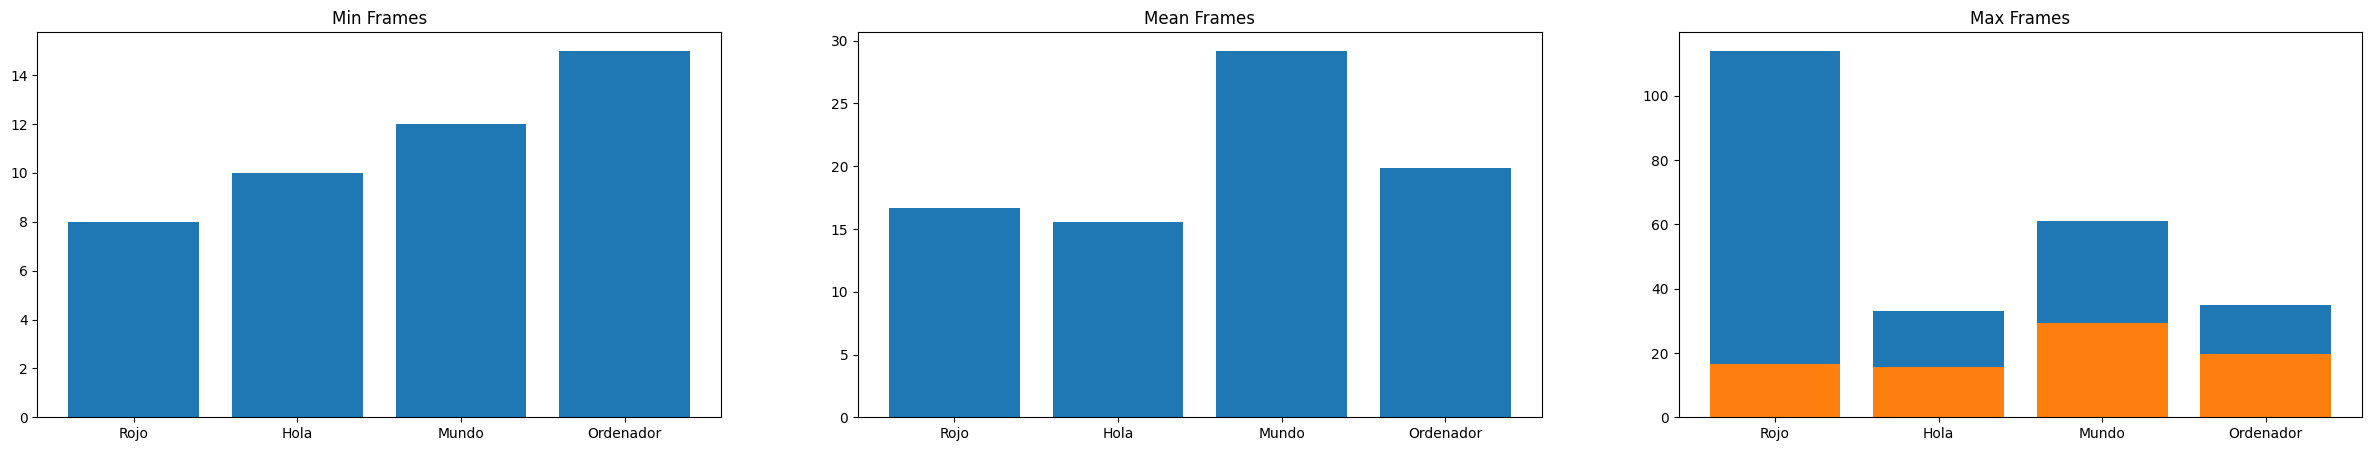

In [107]:
print("Media de frames de todas las muestras: ", hold.mean())
fig, axs = plt.subplots(1, 3, figsize=(30, 5))
axs[0].bar(["Rojo", "Hola", "Mundo", "Ordenador"], hold_min)
axs[1].bar(["Rojo", "Hola", "Mundo", "Ordenador"], hold)
axs[2].bar(["Rojo", "Hola", "Mundo", "Ordenador"], hold_max)

axs[0].set_title("Min Frames")
axs[1].set_title("Mean Frames")
axs[2].set_title("Max Frames")

plt.bar([x for x in range(len(hold))], hold)
plt.show()

Vemos que aunque hayamos eliminado datos, las estadísticas siguen más o menos iguales, lo que significa que en los datos no había muchos frames que cumpliesen los requisitos para ser considerados erroneos.

Una vez limpiado los datos, ya podemos sacar volver a guardar los dataframes. 

In [ ]:
if not os.path.exists("../data/treatedDF/"):
    os.mkdir("../data/treatedDF/")
for index, x in enumerate(ls):
    x.to_hdf(f"../data/treatedDF/{ls_name[index]}_tratado.h5",key="data",mode="w")